In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = Path.cwd().parent / "hawking_data_dir" / "objects_dir"
class_name = "cart"

In [3]:
for path in (data_dir / class_name).glob("*.jpg"):
    image = cv2.imread(str(path))
    h, w = image.shape[:-1]

    edges = cv2.Canny(image, 0, 255)
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
    flood_mask = np.zeros((h + 2, w + 2), np.uint8)
    cv2.floodFill(closing, flood_mask, (0, 0), 255)

    mask = np.ones((h, w), np.uint8) * 2
    mask[flood_mask[1:-1, 1:-1] == 0] = 1

    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    rect = (1, 1, w, h)

    cv2.grabCut(image, mask, None, bgd_model, fgd_model, 10, cv2.GC_INIT_WITH_MASK)
    try:
        transparent_image = cv2.imread(str(path.with_suffix(".png")), cv2.IMREAD_UNCHANGED)
        processed_mask = np.where((mask == 2) | (mask == 0) | (transparent_image[:, :, -1] == 0), 1, 0).astype("uint8")
    except TypeError:
        processed_mask = np.where((mask == 2) | (mask == 0), 1, 0).astype("uint8")

    cv2.imwrite(str(path.with_suffix(".pbm")), processed_mask, (33, 1))

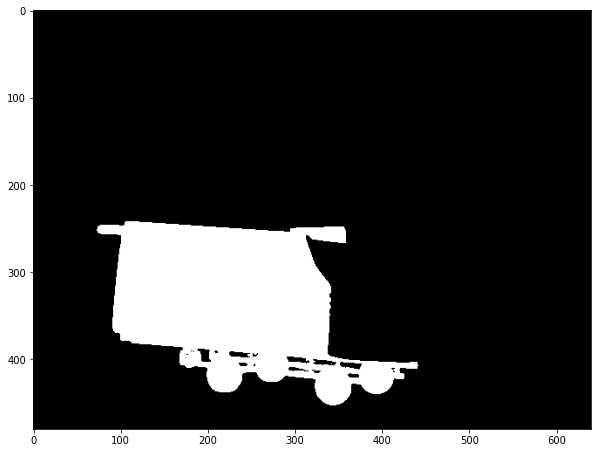

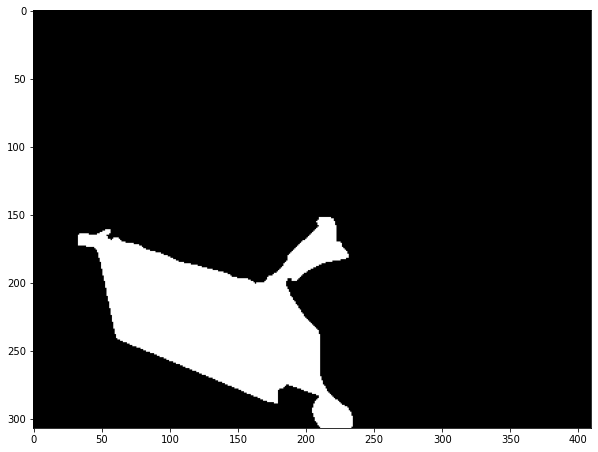

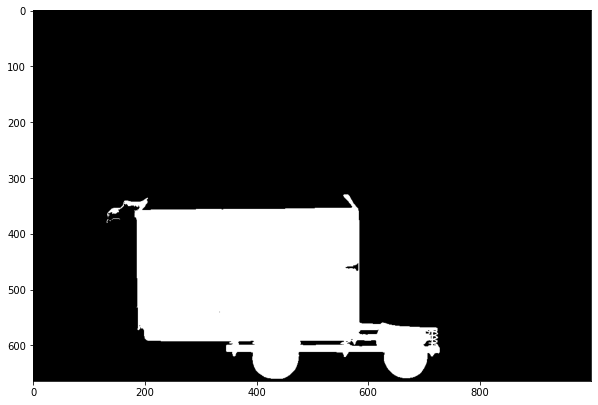

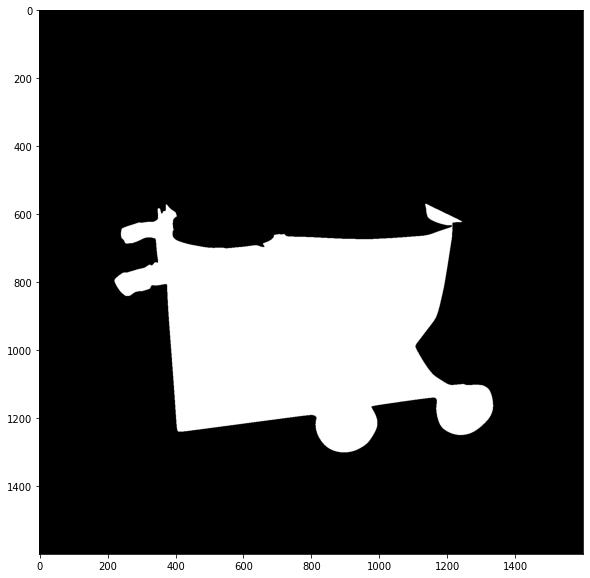

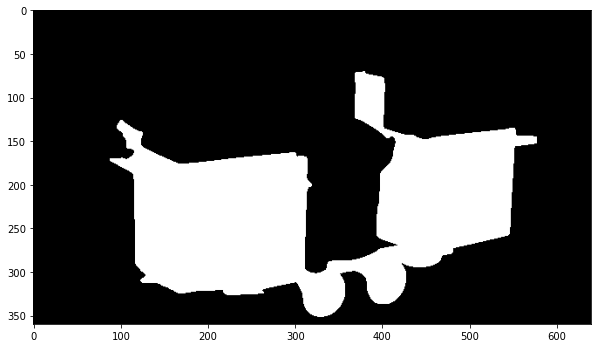

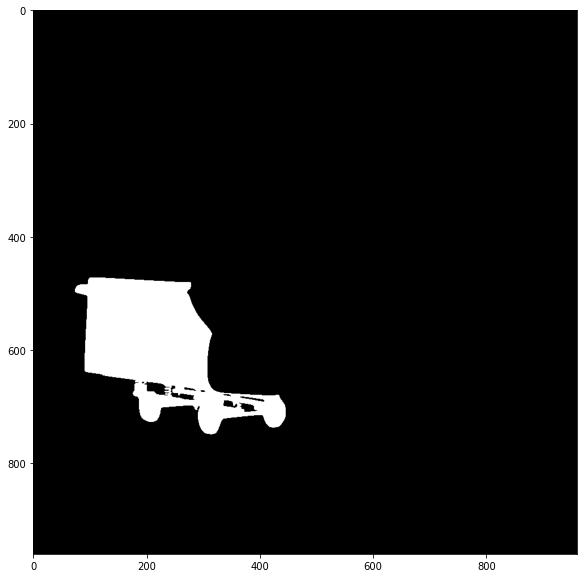

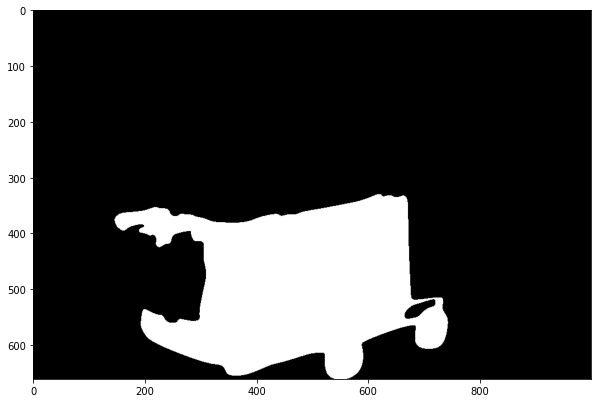

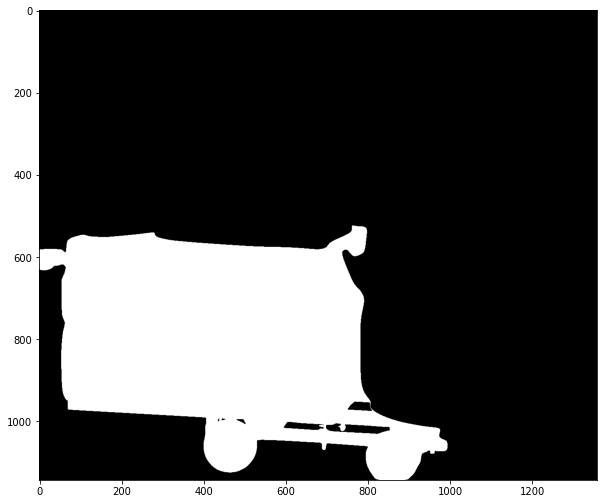

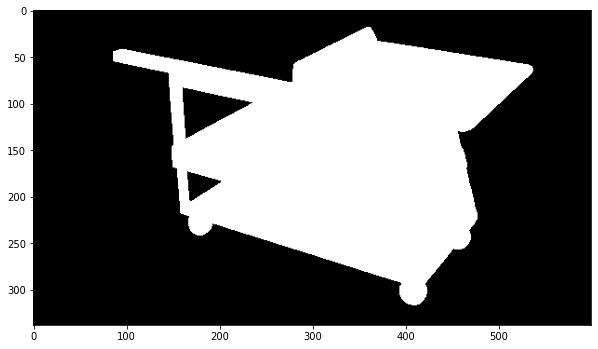

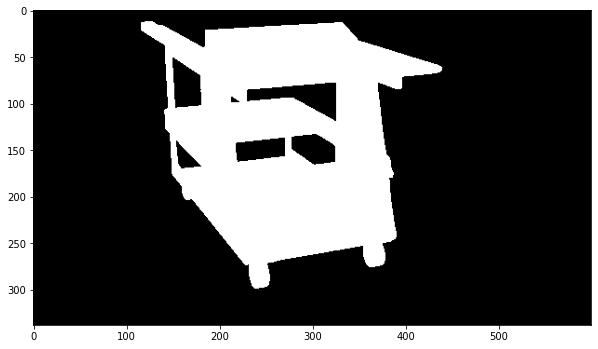

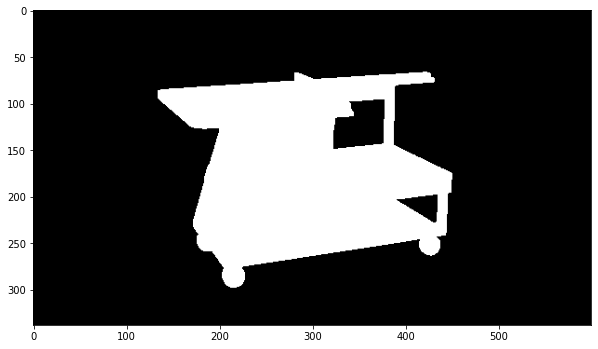

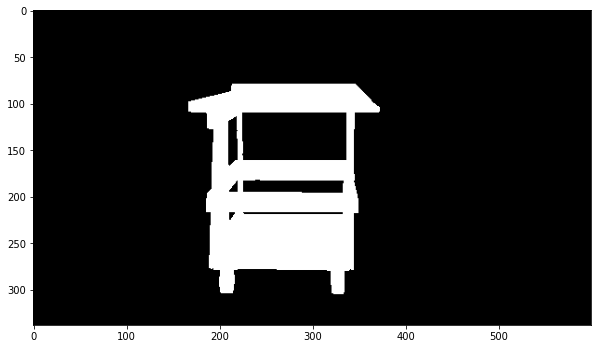

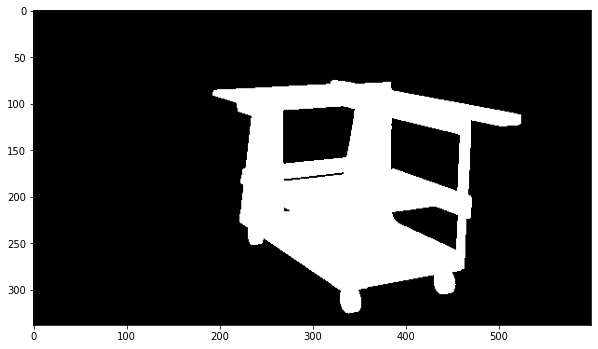

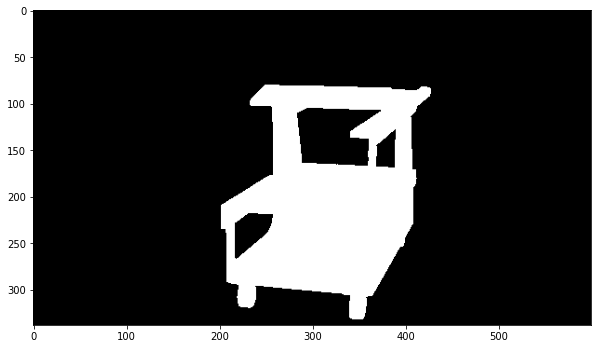

In [4]:
for path in (data_dir / class_name).glob("*.jpg"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(cv2.imread(str(path))[:, :, ::-1])
    ax.imshow(255 - cv2.imread(str(path.with_suffix(".pbm"))))